# **DentAssist**
##**Detecting your mouth and teeth diseases**

##**Import All Packages / Libraries Used**

#### **1. Instalasi TensorFlow dan TensorFlowjs**

In [ ]:
# Instalasi tensorFlow dan tensorFlowjs
!pip install tensorflow --quiet
!pip install tensorflowjs --quiet

!pip show tensorflow
!pip show tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 70.4 MB/s eta 0:00:00
Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, te

#### **2. Import Semua Packages dan Library yang Digunakan**

In [ ]:
# Frequently used libraries
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Libraries for image data processing
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Libraries for model building
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Input, InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV3Small, MobileNetV2

#### **3. Opsional**

In [ ]:
# Disables warnings that may appear, such as FutureWarning warnings.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Print the version of TensorFlow currently in use
print(tf.__version__)

2.17.1


## **Data Preparation**

#### **1. Data Loading**

#####The original dataset is sourced from **Kaggle** [Link1](https://www.kaggle.com/datasets/salmansajid05/oral-diseases/data) [Link2](https://www.kaggle.com/datasets/alielhenidy/tooth-dataset). However, the dataset has been uploaded to the team's Google Drive to make it easier to download.

In [ ]:
# Download File
!gdown --id 1OuegW5qPZUchfYhFupOsiOvlai82fJxo


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1OuegW5qPZUchfYhFupOsiOvlai82fJxo
From (redirected): https://drive.google.com/uc?id=1OuegW5qPZUchfYhFupOsiOvlai82fJxo&confirm=t&uuid=ad6ffd1b-12c1-475f-922b-dfb995e20db1
To: /content/model.zip
100% 401M/401M [00:09<00:00, 43.2MB/s]


In [ ]:
!unzip model.zip

Streaming output truncated to the last 5000 lines.
  inflating: model/val/Hypodontia/(24).JPG  
  inflating: __MACOSX/model/val/Hypodontia/._(24).JPG  
  inflating: model/val/Hypodontia/(233).JPG  
  inflating: __MACOSX/model/val/Hypodontia/._(233).JPG  
  inflating: model/val/Hypodontia/(73).JPG  
  inflating: __MACOSX/model/val/Hypodontia/._(73).JPG  
  inflating: model/val/Hypodontia/hypondontia_2_227.JPG  
  inflating: __MACOSX/model/val/Hypodontia/._hypondontia_2_227.JPG  
  inflating: model/val/Hypodontia/hypondontia_2_233.JPG  
  inflating: __MACOSX/model/val/Hypodontia/._hypondontia_2_233.JPG  
  inflating: model/val/Hypodontia/(65).JPG  
  inflating: __MACOSX/model/val/Hypodontia/._(65).JPG  
  inflating: model/val/Hypodontia/hypondontia_2_390.JPG  
  inflating: __MACOSX/model/val/Hypodontia/._hypondontia_2_390.JPG  
  inflating: model/val/Hypodontia/hypondontia_2_384.JPG  
  inflating: __MACOSX/model/val/Hypodontia/._hypondontia_2_384.JPG  
  inflating: model/val/Hypodontia/h

In [ ]:
# Change the model directory name to DentAssist

!mv model DentAssist

In [ ]:
import os
from PIL import Image

# Function to view image resolution
def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)

        # Ignore files that are not directories
        if not os.path.isdir(subdir_path):
            continue

        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)

            # Ignore non-image files
            if not img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):
                continue

            try:
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)
            except Exception as e:
                print(f"Skipping file {img_path}: {e}")

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal: {total_images}")

print("Data Training")
print_images_resolution("DentAssist/train")
print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Data Validation")
print_images_resolution("DentAssist/val")


Data Training
Healthy_Tooth: 2000
- (474, 242)
- (355, 270)
- (480, 292)
- (474, 315)
- (370, 270)
- (640, 640)
- (441, 266)
- (800, 400)
- (1200, 1200)
- (3534, 1738)
- (1600, 1066)
- (474, 363)
- (4288, 2816)
- (448, 600)
- (900, 599)
- (800, 521)
- (480, 251)
- (397, 244)
- (474, 283)
- (5184, 3456)
- (595, 292)
- (4770, 2684)
- (290, 174)
- (300, 176)
- (474, 267)
- (4790, 3031)
- (600, 400)
- (2000, 1333)
- (2048, 1361)
- (650, 495)
- (1280, 854)
- (474, 269)
- (600, 338)
- (540, 360)
- (1920, 1080)
- (292, 270)
- (373, 270)
- (225, 225)
- (2896, 3216)
- (700, 393)
- (275, 183)
- (800, 532)
- (717, 479)
- (414, 280)
- (274, 184)
- (388, 270)
- (4608, 3072)
- (297, 170)
- (337, 270)
- (286, 176)
- (474, 266)
- (465, 263)
- (640, 426)
- (5089, 4016)
- (341, 148)
- (397, 266)
- (650, 366)
- (474, 314)
- (300, 168)
- (1018, 640)
- (1430, 822)
- (3200, 1901)
- (1270, 635)
- (453, 266)
- (1460, 996)
- (480, 320)
- (630, 420)
- (415, 266)
- (1208, 869)
- (201, 270)
- (332, 152)
- (480, 2

In [ ]:
# Randomize image resolution function
# The randomized image will overwrite the existing file.
def random_resize_images(directory):
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)

        # Ignore if not a directory
        if not os.path.isdir(subdir_path):
            continue

        image_files = os.listdir(subdir_path)
        print(f"{subdir}: {len(image_files)}")

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)

            # Ignore `.DS_Store` files or non-image files
            if img_file == ".DS_Store" or not img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):
                continue

            try:
                with Image.open(img_path) as img:
                    # Convert image mode to RGB if necessary
                    if img.mode != "RGB":
                        img = img.convert("RGB")

                    # Resize image
                    width = random.randint(400, 512)
                    height = random.randint(400, 512)
                    img = img.resize((width, height))

                    # Save image
                    img.save(img_path)
            except Exception as e:
                print(f"Skipping file {img_path}: {e}")

print("Data Training")
random_resize_images("DentAssist/train")
print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Data Validation")
random_resize_images("DentAssist/val")

Data Training
Healthy_Tooth: 2000
Hypodontia: 2000
Caries: 2000
Mouth_Ulcer: 2000
Calculus: 2001

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Data Validation
Healthy_Tooth: 500
Hypodontia: 500
Caries: 500
Mouth_Ulcer: 500
Calculus: 500


In [ ]:
# Review image resolution after randomize
print("Data Training")
print_images_resolution("DentAssist/train")
print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Data Validation")
print_images_resolution("DentAssist/val")

Streaming output truncated to the last 5000 lines.
- (424, 433)
- (416, 429)
- (435, 442)
- (422, 509)
- (499, 463)
- (437, 408)
- (429, 404)
- (480, 486)
- (485, 421)
- (449, 498)
- (469, 476)
- (464, 483)
- (494, 505)
- (495, 470)
- (507, 444)
- (445, 469)
- (424, 446)
- (511, 414)
- (410, 511)
- (509, 490)
- (489, 432)
- (501, 406)
- (446, 470)
- (485, 434)
- (497, 408)
- (483, 473)
- (495, 447)
- (412, 449)
- (434, 473)
- (480, 440)
- (477, 434)
- (450, 417)
- (510, 468)
- (469, 430)
- (415, 459)
- (493, 415)
- (498, 493)
- (471, 476)
- (443, 414)
- (407, 491)
- (494, 459)
- (460, 503)
- (501, 504)
- (435, 409)
- (495, 460)
- (496, 425)
- (441, 489)
- (468, 443)
- (488, 421)
- (506, 469)
- (434, 450)
- (413, 427)
- (499, 430)
- (410, 501)
- (457, 433)
- (477, 411)
- (489, 422)
- (480, 453)
- (446, 460)
- (512, 405)
- (436, 495)
- (408, 433)
- (479, 493)
- (401, 430)
- (423, 448)
- (488, 434)
- (510, 458)
- (442, 403)
- (459, 492)
- (451, 408)
- (456, 486)
- (429, 469)
- (502, 453)


In [ ]:
# Initial directory for train and test
train_dir = "DentAssist/train"
test_dir = "DentAssist/val"

# Initial directory for train and test
combined_dir = "DentAssist/dataset"

In [ ]:
# Create a new directory for the merged dataset
# exist_ok true to avoid errors if the directory already exists
os.makedirs(combined_dir, exist_ok=True)

In [ ]:
# Copy files and folders from train
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Copy files and folders from test
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

#### **2. Checking Data**

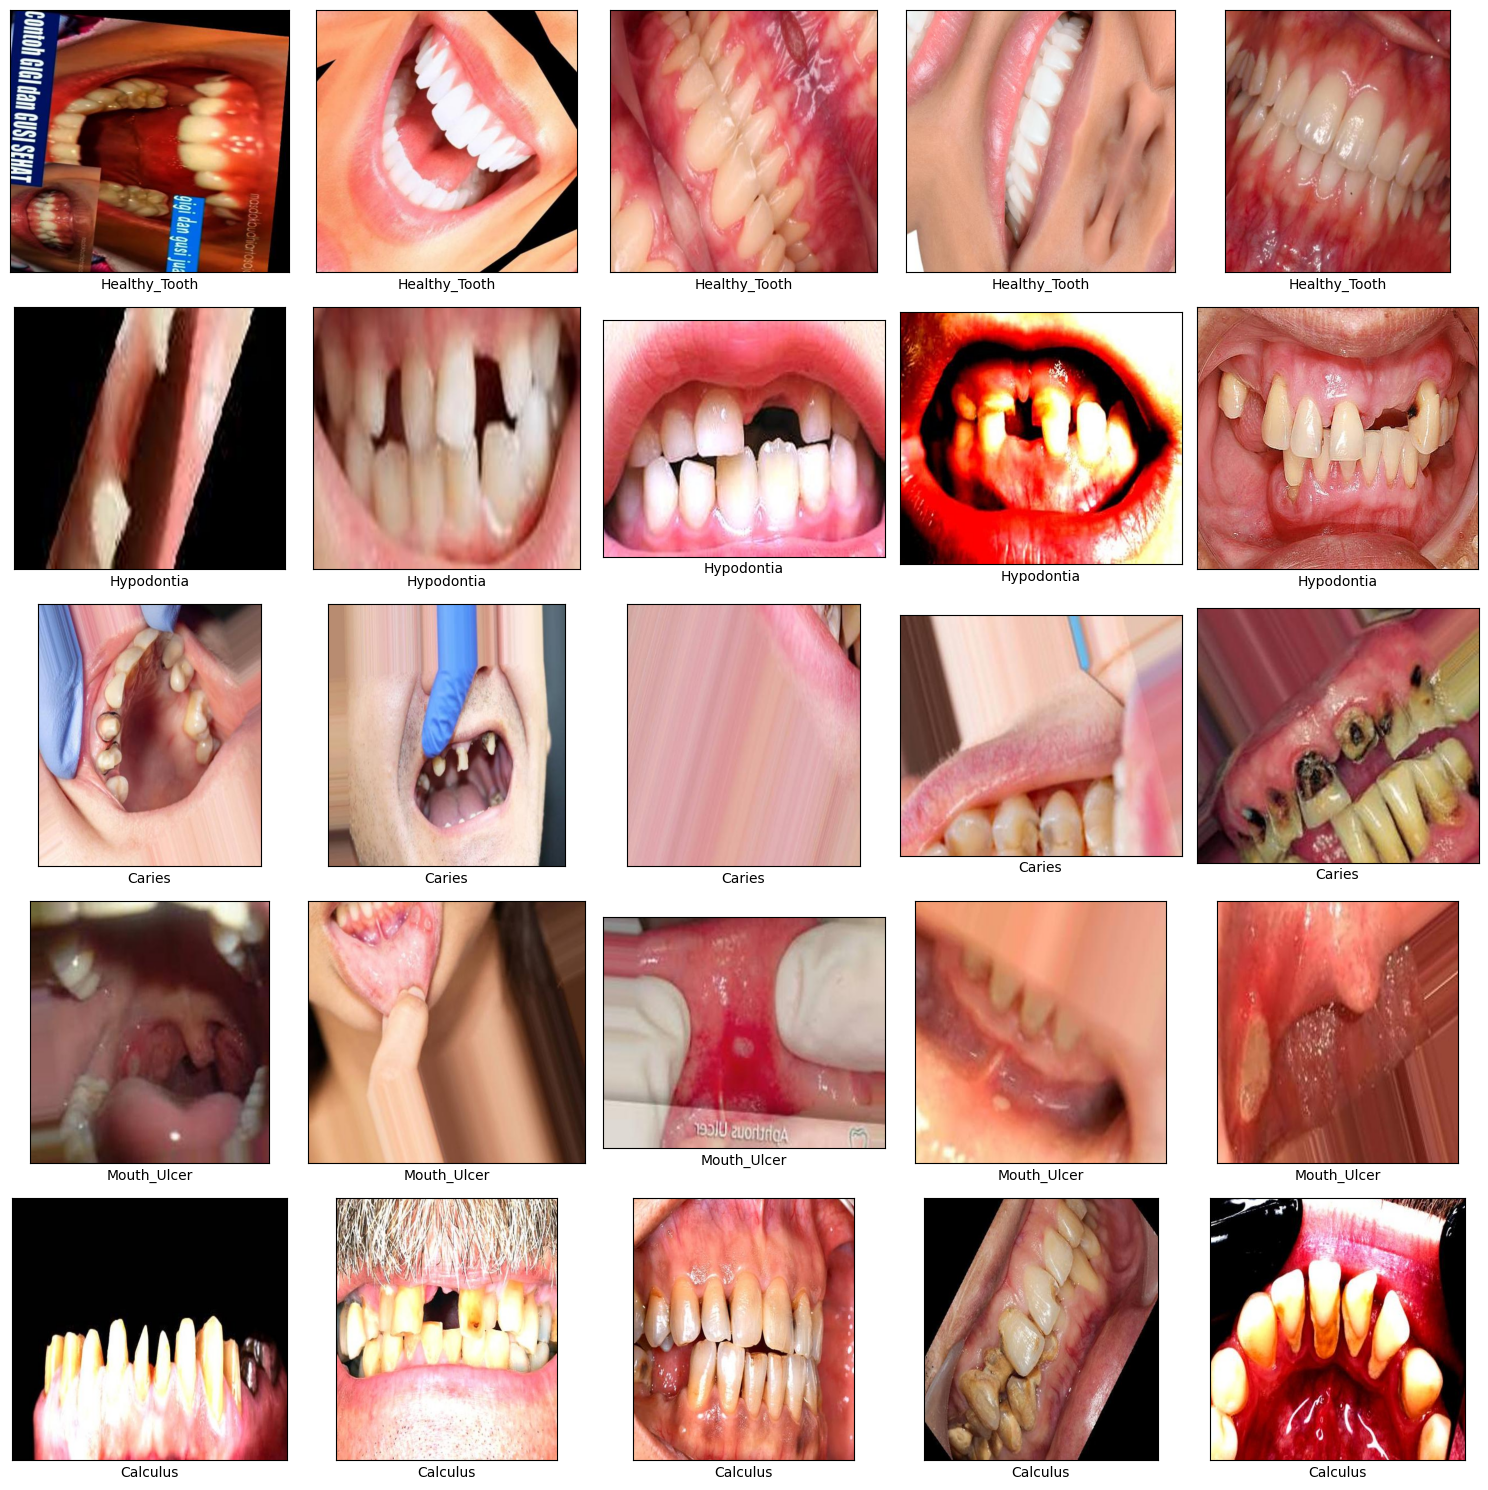

In [ ]:
# Create a dictionary that stores images for each class in the data
DentAssist_image = {}

# Specify the source path of the train
path = "DentAssist/"
path_sub = os.path.join(path, "dataset")
for i in os.listdir(path_sub):
    DentAssist_image[i] = os.listdir(os.path.join(path_sub, i))

# Randomly display 5 images under each of the 5 classes of data
# You will see a different image each time this code is run
path_sub = "DentAssist/dataset/"

# Randomly display 5 images under each class from the training data.
fig, axs = plt.subplots(len(DentAssist_image.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(path_sub)):
    images = np.random.choice(DentAssist_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, class_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])


fig.tight_layout()

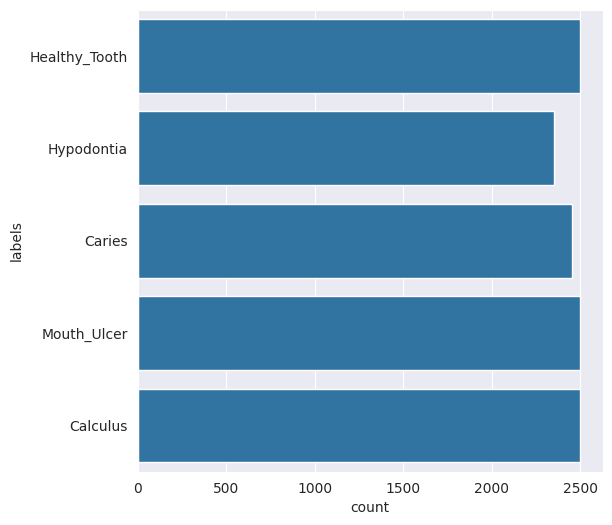

In [ ]:
# Define the source path
DentAssist_path = "DentAssist/dataset/"

# Create a list that stores data for each file name, file path, and label in the data
file_name = []
labels = []
full_path = []

# Get image file name, file path, and label one by one by looping, and save as dataframe
for path, subdirs, files in os.walk(DentAssist_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Plot the distribution of images in each class
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

# the results of the diagram show that the five data labels are evenly distributed

##**Data Preprocessing**

#### **1. Split Dataset**

In [ ]:
# Call the mypath variable that holds the image dataset folder
mypath= 'DentAssist/dataset/'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

# Insert the variables that have been collected in the loop above into a dataframe to make it neat.
df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})
# View the amount of image data on each label
df.groupby(['labels']).size()

labels
Calculus         2497
Caries           2454
Healthy_Tooth    2500
Hypodontia       2349
Mouth_Ulcer      2500
dtype: int64

In [ ]:
# Variables used in this data separation where variable x = data path and y = data labels

X= df['path']
y= df['labels']

# Split the initial dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=300)

In [ ]:
# Combine into each dataframe
df_tr = pd.DataFrame({'path':X_train,'labels':y_train,'set':'train'})
df_te = pd.DataFrame({'path':X_test,'labels':y_test,'set':'test'})

In [ ]:
# Merge DataFrame df_tr and df_te
df_all = pd.concat([df_tr, df_te], ignore_index=True)

print('===================================================== \n')
print(df_all.groupby(['set', 'labels']).size(), '\n')
print('===================================================== \n')

# Check sample data
print(df_all.sample(5))

# Calls the original dataset containing all image data corresponding to its labels
datasource_path = "DentAssist/dataset/"
# Create a Dataset variable, a place to store data that has been divided into training and testing data.
dataset_path = "Dataset-Final/"

for index, row in tq(df_all.iterrows()):
    # Filepath detection
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['labels'],row['image'].split('.')[0])

    # Create a destination directory for the folder
    if os.path.exists(os.path.join(dataset_path,row['set'],row['labels'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['labels']))

    # Specify file destination
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['labels'],destination_file_name)

    # Copy files from source to destination
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)


set    labels       
test   Calculus          531
       Caries            531
       Healthy_Tooth     484
       Hypodontia        415
       Mouth_Ulcer       499
train  Calculus         1966
       Caries           1923
       Healthy_Tooth    2016
       Hypodontia       1934
       Mouth_Ulcer      2001
dtype: int64 


                                                    path         labels    set
9862   DentAssist/dataset/Hypodontia/hypondontia_2_10...     Hypodontia   test
10500            DentAssist/dataset/Hypodontia/(709).JPG     Hypodontia   test
12187           DentAssist/dataset/Hypodontia/(1110).jpg     Hypodontia   test
5775      DentAssist/dataset/Calculus/calculus_2_963.jpg       Calculus  train
8706   DentAssist/dataset/Healthy_Tooth/a9d227efda795...  Healthy_Tooth  train


0it [00:00, ?it/s]

#### **2. Image Data Generator**
perform image augmentation and pre-processing automatically during model training.

- split the dataset into training and validation sets
- normalize images by scaling pixel values
- feed image data directly to the model during training, evaluation, and prediction

In [ ]:
# Define training and test directories
TRAIN_DIR = "Dataset-Final/train/"
TEST_DIR = "Dataset-Final/test/"

train_Calculus = os.path.join(TRAIN_DIR + '/Calculus')
train_Caries = os.path.join(TRAIN_DIR + '/Caries')
train_Healthy_Tooth = os.path.join(TRAIN_DIR + '/Healthy_Tooth')
train_Hypodontia = os.path.join(TRAIN_DIR + '/Hypodontia')
train_Mouth_Ulcer = os.path.join(TRAIN_DIR + '/Mouth_Ulcer')
test_Calculus = os.path.join(TRAIN_DIR + '/Calculus')
test_Caries = os.path.join(TRAIN_DIR + '/Caries')
test_Healthy_Tooth = os.path.join(TRAIN_DIR + '/Healthy_Tooth')
test_Hypodontia = os.path.join(TRAIN_DIR + '/Hypodontia')
test_Mouth_Ulcer = os.path.join(TRAIN_DIR + '/Mouth_Ulcer')

print("Total number of calculus images in training set: ",len(os.listdir(train_Calculus)))
print("Total number of caries images in training set: ",len(os.listdir(train_Caries)))
print("Total number of healthy_tooth images in training set: ",len(os.listdir(train_Healthy_Tooth)))
print("Total number of hypodontia images in training set: ",len(os.listdir(train_Hypodontia)))
print("Total number of mouth_ulcer images in training set: ",len(os.listdir(train_Mouth_Ulcer)))
print("Total number of calculus images in test set: ",len(os.listdir(test_Calculus)))
print("Total number of caries images in test set: ",len(os.listdir(test_Caries)))
print("Total number of healthy_tooth images in test set: ",len(os.listdir(test_Healthy_Tooth)))
print("Total number of hypodontia images in test set: ",len(os.listdir(test_Hypodontia)))
print("Total number of mouth_ulcer images in test set: ",len(os.listdir(test_Mouth_Ulcer)))

Total number of calculus images in training set:  1966
Total number of caries images in training set:  1923
Total number of healthy_tooth images in training set:  2016
Total number of hypodontia images in training set:  1934
Total number of mouth_ulcer images in training set:  2001
Total number of calculus images in test set:  1966
Total number of caries images in test set:  1923
Total number of healthy_tooth images in test set:  2016
Total number of hypodontia images in test set:  1934
Total number of mouth_ulcer images in test set:  2001


In [ ]:
# Create an ImageDataGenerator object that normalizes the image
# Remove the validation_split parameter
datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Use all training data
train_generator = datagen.flow_from_directory(TRAIN_DIR,
                                              batch_size=32,
                                              target_size=(150,150),
                                              color_mode="rgb",
                                              class_mode='categorical',
                                              shuffle=True)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  batch_size=32,
                                                  target_size=(150,150),
                                                  color_mode="rgb",
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 9839 images belonging to 5 classes.
Found 2460 images belonging to 5 classes.


## **Modelling**

In [ ]:
# Loading the pre-trained MobileNetV2 model
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

# Freezing all layers of the pre-trained model
pre_trained_model.trainable = False

# Creating a Sequential model and adding MobileNetV2 as the base
model = Sequential()

# Adding the pre-trained MobileNetV2
model.add(pre_trained_model)

# Adding additional Conv2D and Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the output from the previous layer
model.add(Flatten())

# Adding Dropout to prevent overfitting
model.add(Dropout(0.3))

# Adding a fully connected Dense layer
model.add(Dense(128, activation='relu'))

# Adding an output layer with softmax for 5-category classification
model.add(Dense(5, activation='softmax'))

<ipython-input-26-1a041525f3f6>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pre_trained_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Create optimizer
int_lr = 1e-4

optimizer = tf.optimizers.Adam(learning_rate=int_lr)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Callback to stop training if accuracy and validation accuracy are above 97%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97 and logs.get('val_accuracy')>0.97):
      print("\nAkurasi dan validation akurasi telah mencapai >97%!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# Calculate the number of samples for each class
count_Calculus = len(os.listdir(train_Calculus))
count_Caries = len(os.listdir(train_Caries))
count_Healthy_Tooth = len(os.listdir(train_Healthy_Tooth))
count_Hypodontia = len(os.listdir(train_Hypodontia))
count_Mouth_Ulcer = len(os.listdir(train_Mouth_Ulcer))

# Total samples
total_samples = count_Calculus + count_Caries + count_Healthy_Tooth + count_Hypodontia + count_Mouth_Ulcer

# Calculate class weight for each class
weight_Calculus = (1 / count_Calculus) * total_samples / 2.0
weight_Caries = (1 / count_Caries) * total_samples / 2.0
weight_Healthy_Tooth = (1 / count_Healthy_Tooth) * total_samples / 2.0
weight_Hypodontia = (1 / count_Hypodontia) * total_samples / 2.0
weight_Mouth_Ulcer = (1 / count_Mouth_Ulcer) * total_samples / 2.0

# Create a weights class dictionary
class_weights = {
    0: weight_Calculus,
    1: weight_Caries,
    2: weight_Healthy_Tooth,
    3: weight_Hypodontia,
    4: weight_Mouth_Ulcer
}

%time

# Fitting / training model
history_1 = model.fit(train_generator,
                        epochs=30,
                        batch_size=32,
                        validation_data=test_generator,
                        callbacks=[callbacks],
                        class_weight = class_weights)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


308/308 ━━━━━━━━━━━━━━━━━━━━ 281s 890ms/step - accuracy: 0.5736 - loss: 2.6549 - val_accuracy: 0.8646 - val_loss: 0.3723
Epoch 2/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 287s 779ms/step - accuracy: 0.8906 - loss: 0.8154 - val_accuracy: 0.9057 - val_loss: 0.2687
Epoch 3/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 259s 772ms/step - accuracy: 0.9232 - loss: 0.5568 - val_accuracy: 0.9179 - val_loss: 0.2396
Epoch 4/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 272s 807ms/step - accuracy: 0.9518 - loss: 0.3833 - val_accuracy: 0.9402 - val_loss: 0.1922
Epoch 5/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 295s 913ms/step - accuracy: 0.9668 - loss: 0.2692 - val_accuracy: 0.9431 - val_loss: 0.1954
Epoch 6/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 292s 817ms/step - accuracy: 0.9803 - loss: 0.1809 - val_accuracy: 0.9447 - val_loss: 0.1983
Epoch 7/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 254s 792ms/step - accuracy: 0.9821 - loss: 0.1436 - val_accuracy: 0.9472 - val_loss: 0.1952
Epoch 8/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 254s 824ms/step - accuracy: 0.9883 - loss: 0.10

## **Evaluasi dan Visualisasi**

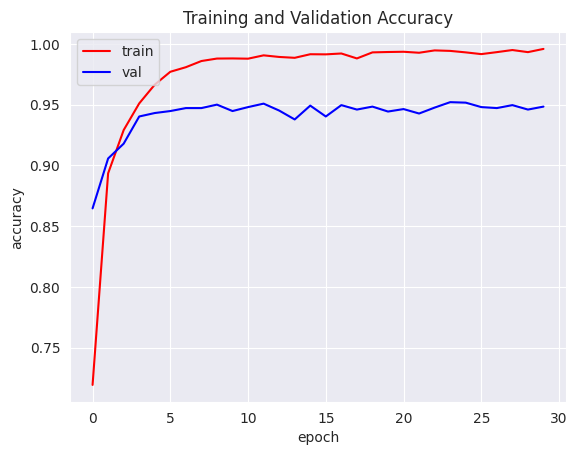

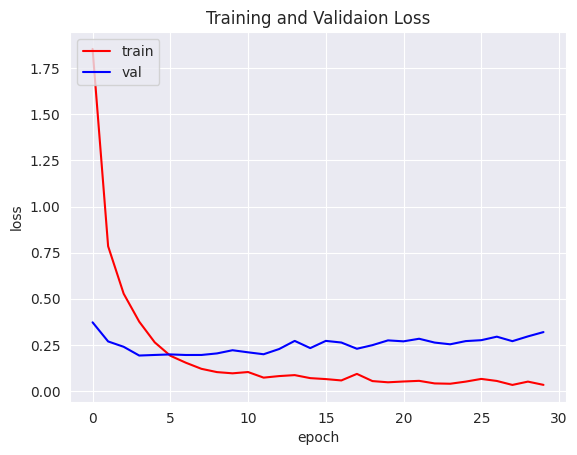

In [ ]:
# Displays a graph of the results of model training
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

### if no line appears on the graph, it is because the model was only trained once / 1 epoch



               precision    recall  f1-score   support

     Calculus     0.9404    0.9812    0.9604       531
       Caries     0.9033    0.9153    0.9093       531
Healthy_Tooth     0.9746    0.9504    0.9623       484
   Hypodontia     0.9618    0.9711    0.9664       415
  Mouth_Ulcer     0.9706    0.9279    0.9488       499

     accuracy                         0.9484      2460
    macro avg     0.9502    0.9492    0.9494      2460
 weighted avg     0.9489    0.9484    0.9484      2460



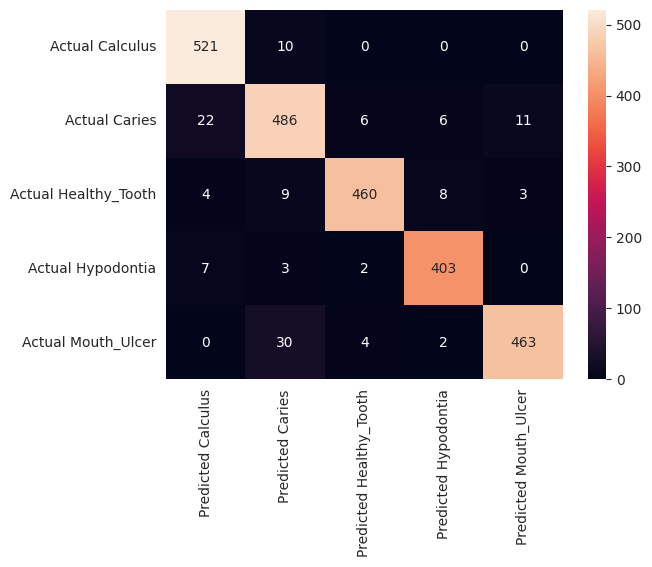

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Making predictions using the trained model
test_generator.reset()  # Reset the generator to avoid prediction issues

preds_1 = model.predict(test_generator, verbose=0)
preds_1 = preds_1.copy()

# Extracting the argmax of the predictions since we have 5 classes
preds_1 = preds_1.argmax(axis=1)

# Define labels corresponding to the classes (0: Calculus, 1: Caries, 2: Healthy_Tooth, 3: Hypodontia, 4: Mouth_Ulcer)
labels = ['Calculus', 'Caries', 'Healthy_Tooth', 'Hypodontia', 'Mouth_Ulcer']

# Print the Confusion Matrix
cm = pd.DataFrame(data=confusion_matrix(test_generator.classes, preds_1, labels=[0, 1, 2, 3, 4]),
                  index=["Actual Calculus", "Actual Caries", "Actual Healthy_Tooth", "Actual Hypodontia", "Actual Mouth_Ulcer"],
                  columns=["Predicted Calculus", "Predicted Caries", "Predicted Healthy_Tooth", "Predicted Hypodontia", "Predicted Mouth_Ulcer"])

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")

# Print the Classification Report
print("\n")
print(classification_report(y_true=test_generator.classes, y_pred=preds_1, target_names=labels, digits=4))


## **Konversi Model**

#### **1. Konversi ke TensorFlow.Js**

In [ ]:
from tensorflow.keras.models import load_model

model.save('model.h5')
model_js = load_model('/content/model.h5')
model_js.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 5, 5, 32)            │         368,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 2, 2, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,654,119 (10.12 MB)

 Trainable params: 396,133 (1.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_js.export('/content/model_js')

Saved artifact at '/content/model_js'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  138482288139728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138482288347968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138482288349552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138482288146592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138482288345680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138482288352192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138482288351488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138482288353952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138482288350432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138482288351840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138482288356

In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model --saved_model_tags=serve /content/model_js /content/model_tfjs

2024-12-09 09:41:58.622125: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733737318.647317    5734 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733737318.654699    5734 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2024-12-09 09:42:02.987719: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
I0000 00:00:1733737325.257843    5734 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00

#### **2. Konversi ke TensorFlow Lite**

In [ ]:
# Tensorflow Lite Conversion
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
tflite_model_file = pathlib.Path("model.tflite")
tflite_model_file.write_bytes(tflite_model)

Saved artifact at '/tmp/tmpj_j8x3t6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  133337028138912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133336959429696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133336959430048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133336959429168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133336959430752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133336959426528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133336959806704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133336959808816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133336959801952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133337028133280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1333369598

10450960

In [ ]:
# Define labels corresponding to the classes (0: Calculus, 1: Caries, 2: Healthy_Tooth, 3: Hypodontia, 4: Mouth_Ulcer)
labels = ['Calculus', 'Caries', 'Healthy_Tooth', 'Hypodontia', 'Mouth_Ulcer']

# Save the label to the label.txt file
with open('label.txt', 'w') as f:
  for label in labels:
    f.write(label + '\n')


In [ ]:
# create a tflite folder and move model.tflite and label.txt into it
!mkdir tflite
!mv model.tflite label.txt tflite/

In [ ]:
!pip freeze > requirements.txt

In [ ]:
# zip the required folders and files for easy downloading
!zip -r model.zip saved_model tfjs_model tflite model.h5 requirements.txt

  adding: saved_model/ (stored 0%)
  adding: saved_model/DentAssist_model/ (stored 0%)
  adding: saved_model/DentAssist_model/1/ (stored 0%)
  adding: saved_model/DentAssist_model/1/assets/ (stored 0%)
  adding: saved_model/DentAssist_model/1/fingerprint.pb (stored 0%)
  adding: saved_model/DentAssist_model/1/variables/ (stored 0%)
  adding: saved_model/DentAssist_model/1/variables/variables.index (deflated 78%)
  adding: saved_model/DentAssist_model/1/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_model/DentAssist_model/1/saved_model.pb (deflated 90%)
  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/model.json (deflated 97%)
  adding: tfjs_model/group1-shard3of3.bin (deflated 7%)
  adding: tfjs_model/group1-shard2of3.bin (deflated 7%)
  adding: tfjs_model/group1-shard1of3.bin (deflated 7%)
  adding: tflite/ (stored 0%)
  adding: tflite/model.tflite (deflated 7%)
  adding: tflite/label.txt (stored 0%)
  adding: model.h5 (deflated 9%)
  adding: requirements.

## Inference (Optional)


In [ ]:
class_indices = train_generator.class_indices
print(class_indices)

In [ ]:
import tensorflow as tf
import requests

def images_preprocessing(filenames):
    image_tensors = []
    for filename in filenames:
        image = tf.io.decode_image(open(filename, 'rb').read(), channels=3)
        image = tf.image.resize(image, [150, 150])
        image = image / 255.0
        image_tensors.append(image)

    # Convert the list of images into a batch
    image_tensors = tf.stack(image_tensors)
    image_tensors = image_tensors.numpy().tolist()  # Convert to list format for JSON
    return image_tensors

# List of filenames for the images (Cat, Dog, Wild)
filenames = ['images/Calculus.jpg', 'images/Caries.jpg', 'images/Healthy_Tooth.jpg', 'images/Hypodontia.jpg', 'images/Mouth_Ulcer.jpg']

# Prepare the data (image batch) to be sent in the POST request
image_tensors = images_preprocessing(filenames=filenames)

json_data = {
    "instances": image_tensors
}

# Define the endpoint with format: http://localhost:8501/v1/models/MODEL_NAME:predict
endpoint = "http://localhost:8501/v1/models/model_js:predict"

response = requests.post(endpoint, json=json_data)

# Process the response
response_json = response.json()
if 'predictions' in response_json:
    map_labels = {0: "Calculus", 1: "Caries", 2: "Healthy_Tooth", 3: "Hypodontia", 4: "Mouth_Ulcer"}

    # Iterate through each prediction and print the result
    for i, prediction in enumerate(response_json['predictions']):
        predicted_label = tf.argmax(prediction).numpy()  # Get the predicted class
        print(f"Prediction for image {filenames[i]}: {map_labels[predicted_label]}")
else:
    print("Error: 'predictions' key not found in the response.")
    print("Response content:", response_json)
